# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [135]:
df = pd.read_csv('housing.csv')
df_housing = df.dropna().reset_index().copy()
df_housing = pd.get_dummies(df_housing, drop_first=True).astype(int)
df_housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,-122,37,41,880,129,322,126,8,452600,0,0,1,0
1,1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,1,0
2,2,-122,37,52,1467,190,496,177,7,352100,0,0,1,0
3,3,-122,37,52,1274,235,558,219,5,341300,0,0,1,0
4,4,-122,37,52,1627,280,565,259,3,342200,0,0,1,0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

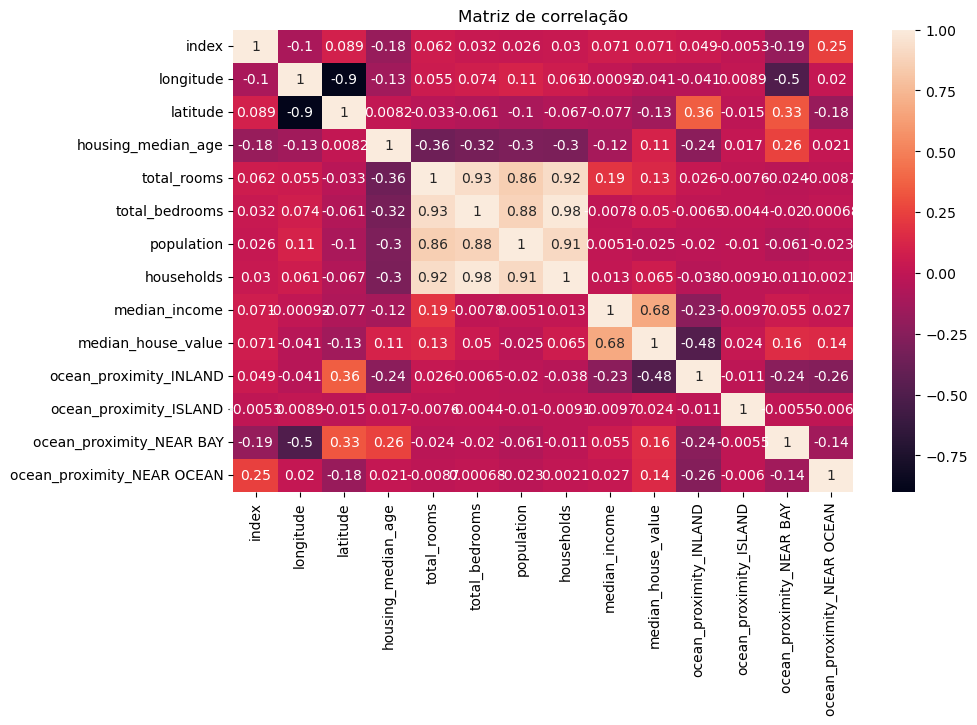

In [138]:
corr = df_housing.corr()

plt.figure(figsize=(10,6))
sns.heatmap(data=corr, annot=True)
plt.title('Matriz de correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [141]:
x = df_housing.drop(columns='median_house_value')

y = df_housing.loc[:, 'median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2360873)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [144]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [147]:
mse_1 = mean_squared_error(y_train, regr_1.predict(x_train))
print(f'Erro Quadratico Médio {mse_1}')
r_sqrd_1 = regr_1.score(x_train, y_train)
print(f'R-quadrado {r_sqrd_1}')

Erro Quadratico Médio 3671638355.857349
R-quadrado 0.7239319178412047


In [149]:
mse_2 = mean_squared_error(y_train, regr_2.predict(x_train))
print(f'Erro Quadratico Médio {mse_2}')
r_sqrd_2 = regr_2.score(x_train, y_train)
print(f'R-quadrado {r_sqrd_2}')

Erro Quadratico Médio 6752669401.19275
R-quadrado 0.49227121236880034


In [151]:
regr_1.fit(x_test, y_test)
regr_2.fit(x_test, y_test)

mse_test_1 = mean_squared_error(y_test, regr_1.predict(x_test))
print(f'Erro Quadratico Médio {mse_test_1}')
r_sqrd_1 = regr_1.score(x_test, y_test)
print(f'R-quadrado {r_sqrd_1}')

Erro Quadratico Médio 3377015095.459241
R-quadrado 0.7479730624245335


In [153]:
mse_test_2 = mean_squared_error(y_test, regr_2.predict(x_test))
print(f'Erro Quadratico Médio {mse_test_2}')
r_sqrd_2 = regr_2.score(x_test, y_test)
print(f'R-quadrado {r_sqrd_2}')

Erro Quadratico Médio 6705441936.852313
R-quadrado 0.49957227058081144


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A arvore mais adequada, segundo os resultados estudados na atividade anterior é a com profundidade 8. Pois chegou ao R² de 63% no estudo de treino e 74% no teste final

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

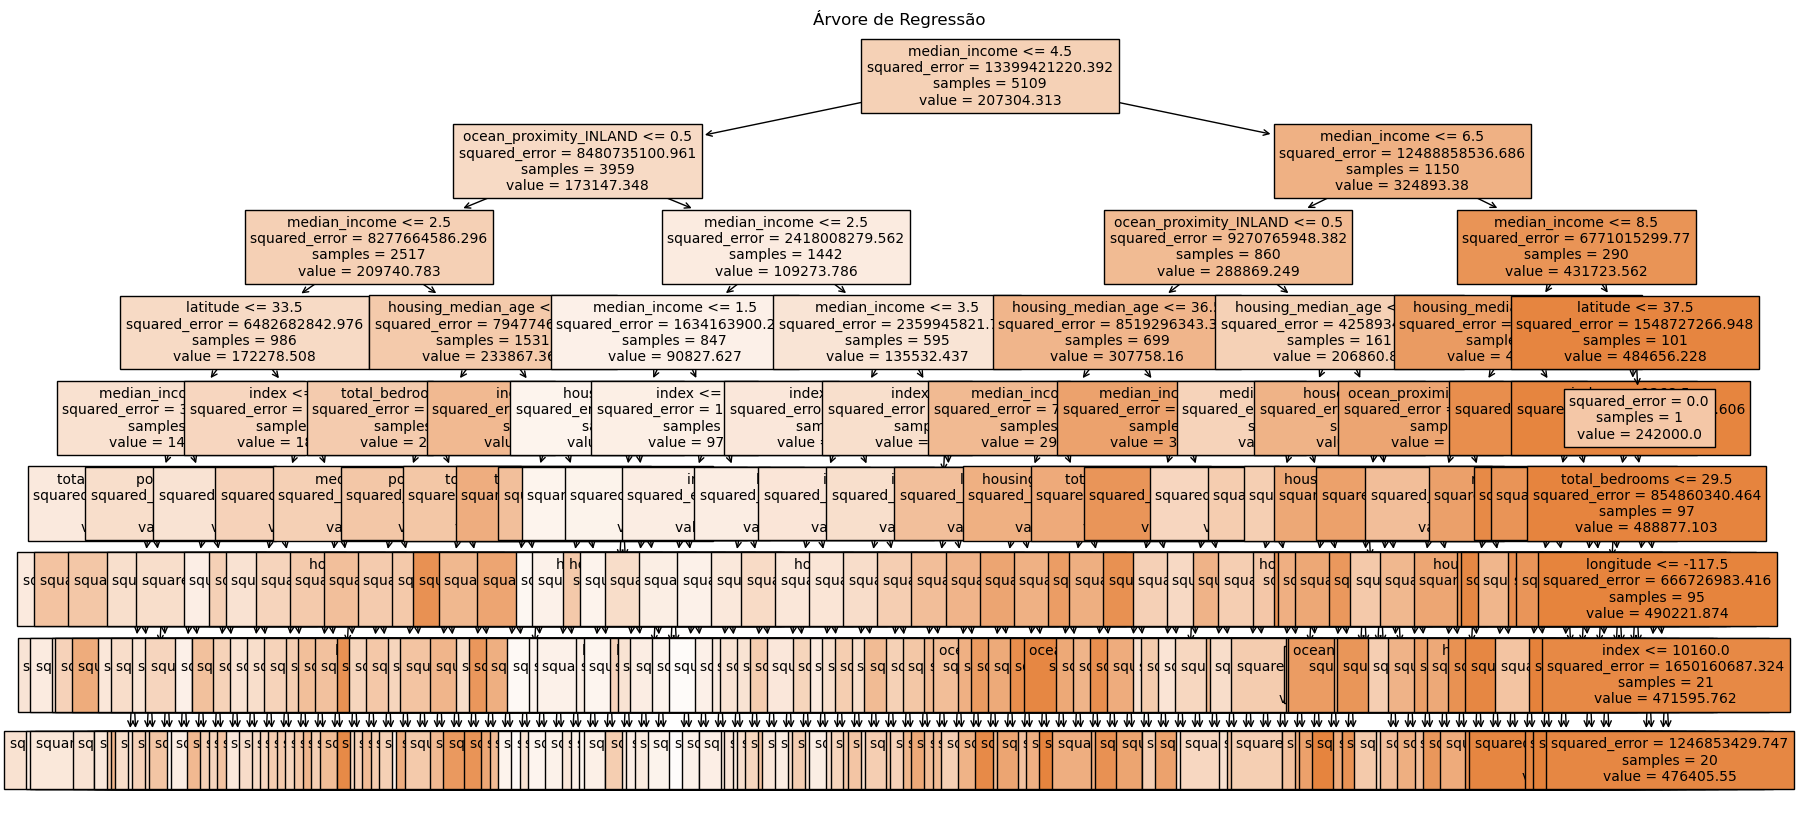

In [164]:
plt.figure(figsize=(20,10))
tree.plot_tree(regr_1, filled=True, feature_names=x.columns, fontsize=10)
plt.title("Árvore de Regressão")
plt.show()